<h2>Beast cancer</h2>
<blockquote>Breast cancer is a dataset records clinical measurements of breast cancer tumors. Each tumor is labeled as 'benign'(harmless tumors) or 'malignant'(dangerous tumors). Let's try to find best algorithms with best accuracy. In this notebook we try on 3 algorithms<br>
    <ol>1.Logisticregression</ol>
    <ol>2.Decision Tree</ol>
    <ol>3.Random Forest

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

cancer=load_breast_cancer()

X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=10)


In [28]:
loreg=LogisticRegression()
loreg.fit(X_train,y_train)
print('accuracy on training set : ',loreg.score(X_train,y_train))
print('accuracy on test set : ',loreg.score(X_test,y_test))

accuracy on training set :  0.9577464788732394
accuracy on test set :  0.9370629370629371


In [3]:
from sklearn.model_selection import GridSearchCV,cross_val_score

param={'C':[0.001,0.01,0.1,1,10]}
grid=GridSearchCV(LogisticRegression(max_iter=2000),param,cv=5)
grid.fit(X_train,y_train)
grid.best_score_

0.9553488372093023

In [4]:
from sklearn.tree import DecisionTreeClassifier

tree=DecisionTreeClassifier(max_depth=5,random_state=10)
tree.fit(X_train,y_train)
tree.score(X_test,y_test)

0.965034965034965

In [5]:
tree.feature_importances_

array([0.00950068, 0.04065498, 0.        , 0.        , 0.        ,
       0.0068616 , 0.00159143, 0.        , 0.        , 0.        ,
       0.01323116, 0.02894776, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.75769476, 0.        , 0.        , 0.0111501 , 0.        ,
       0.        , 0.01477694, 0.11559059, 0.        , 0.        ])

Text(0.5, 0, 'feature importance in decision tree')

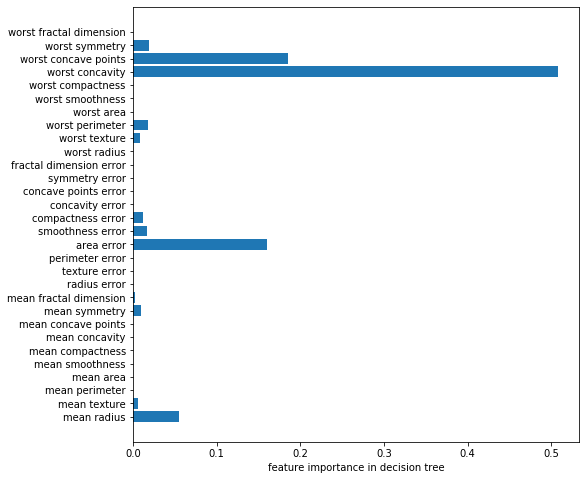

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def plot(model):
    plt.figure(figsize=(8,8))
    n_features=cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_)
    plt.yticks(np.arange(n_features),cancer.feature_names)
    
plot(tree)
plt.xlabel('feature importance in decision tree')

In [29]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(n_estimators=1000).fit(X_train,y_train)
print('accuracy on training set : ',RF.score(X_train,y_train))
print('accuracy on test set : ',RF.score(X_test,y_test))

accuracy on training set :  1.0
accuracy on test set :  0.9440559440559441


Text(0.5, 0, 'feature importance in random forest')

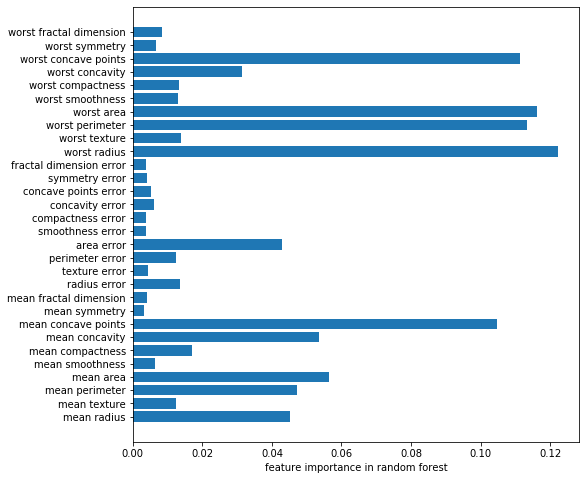

In [30]:
plot(RF)
plt.xlabel('feature importance in random forest')